## 1D Example

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Array(True, dtype=bool)

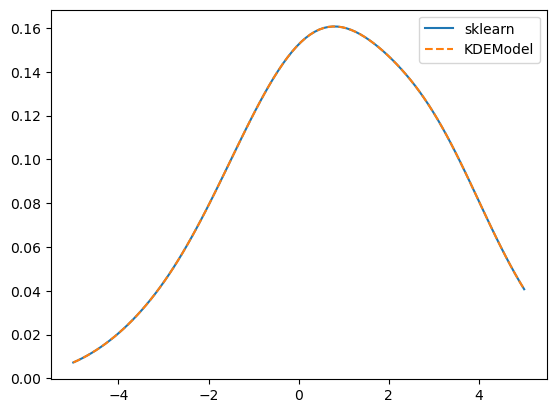

In [1]:
from sklearn.neighbors import KernelDensity
from non_local_detector.likelihoods.common import KDEModel
from scipy.stats import multivariate_normal
import jax.numpy as jnp

import matplotlib.pyplot as plt

n_eval_points = 100
n_dims = 1

eval_points = jnp.linspace(-5, 5, n_eval_points).reshape(-1, 1)
samples = multivariate_normal(mean=1, cov=5).rvs(1000).reshape(-1, 1)

std = jnp.ones((n_dims,))

sk_kde = jnp.exp(
    KernelDensity(kernel="gaussian", bandwidth=1)
    .fit(samples)
    .score_samples(eval_points)
)
jax_kde = KDEModel(std=std).fit(samples=samples).predict(eval_points)

plt.plot(eval_points, sk_kde, label="sklearn")
plt.plot(eval_points, jax_kde, linestyle="--", label="KDEModel")
plt.legend()

jnp.allclose(sk_kde, jax_kde)

Array(True, dtype=bool)

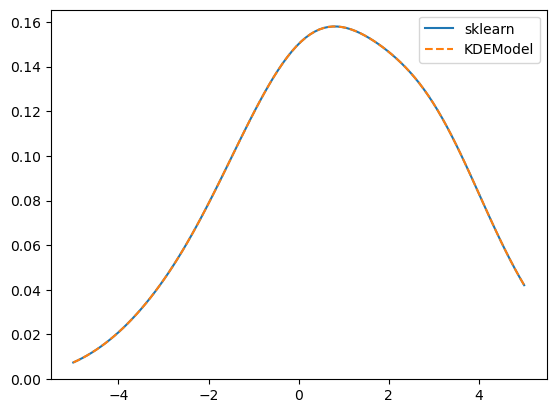

In [2]:
import numpy as np


n_samples = len(samples)
weights = np.ones((n_samples))
weights[: n_samples // 2] = 0.5


sk_kde = jnp.exp(
    KernelDensity(kernel="gaussian", bandwidth=1)
    .fit(samples, sample_weight=weights)
    .score_samples(eval_points)
)
jax_kde = KDEModel(std=std).fit(samples=samples, weights=weights).predict(eval_points)

plt.plot(eval_points, sk_kde, label="sklearn")
plt.plot(eval_points, jax_kde, linestyle="--", label="KDEModel")
plt.legend()

jnp.allclose(sk_kde, jax_kde)

Array(True, dtype=bool)

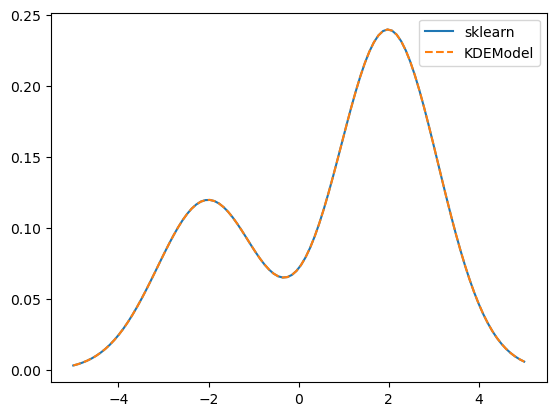

In [3]:
samples = np.concatenate(
    (
        multivariate_normal(mean=2, cov=0.25).rvs(1000).reshape(-1, 1),
        multivariate_normal(mean=-2, cov=0.25).rvs(1000).reshape(-1, 1),
    )
)

n_samples = len(samples)
weights = np.ones((n_samples))
weights[n_samples // 2:] = 0.5


sk_kde = jnp.exp(
    KernelDensity(kernel="gaussian", bandwidth=1)
    .fit(samples, sample_weight=weights)
    .score_samples(eval_points)
)
jax_kde = KDEModel(std=std).fit(samples=samples, weights=weights).predict(eval_points)

plt.plot(eval_points, sk_kde, label="sklearn")
plt.plot(eval_points, jax_kde, linestyle="--", label="KDEModel")
plt.legend()

jnp.allclose(sk_kde, jax_kde)

## 2D example

Text(0.5, 1.0, 'jax')

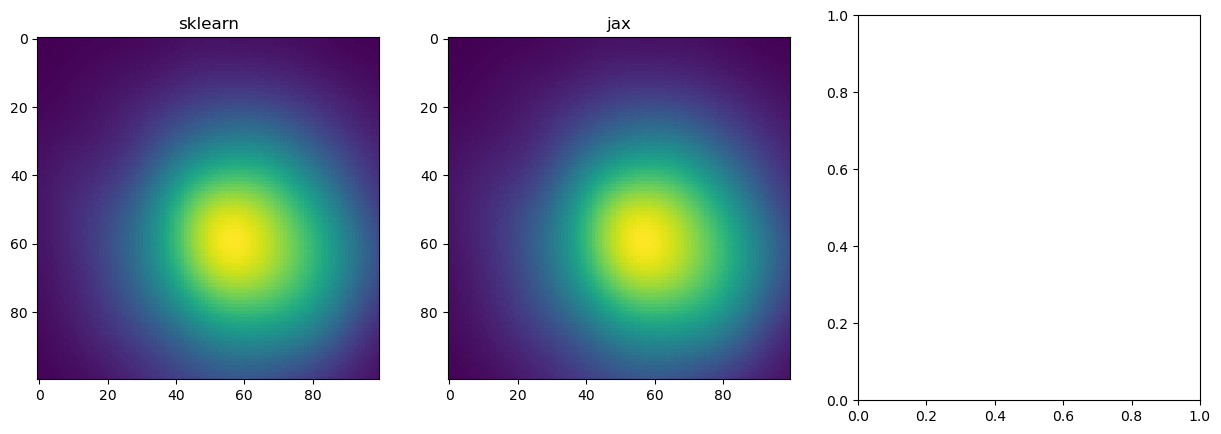

In [8]:
from non_local_detector.likelihoods.clusterless_kde import kde_distance


n_eval_points = 100
n_dims = 2

eval_bins = jnp.linspace(-5, 5, n_eval_points)
eval_points = jnp.array(jnp.meshgrid(eval_bins, eval_bins)).reshape(2, -1).T
samples = multivariate_normal(mean=[1, 1], cov=[[5, 0], [0, 5]]).rvs(1000)


std = jnp.ones((n_dims,))
sk_kde = jnp.exp(
    KernelDensity(kernel="gaussian", bandwidth=1)
    .fit(samples)
    .score_samples(eval_points)
)


dim1_distance = kde_distance(samples[:, [0]], eval_bins[:, None], [std[0]])
dim2_distance = kde_distance(samples[:, [1]], eval_bins[:, None], [std[1]])

jax_kde = KDEModel(std=std).fit(samples=samples).predict(eval_points)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(sk_kde.reshape(n_eval_points, n_eval_points))
axes[0].set_title("sklearn")
axes[1].imshow(jax_kde.reshape(n_eval_points, n_eval_points))
axes[1].set_title("jax")

In [18]:
np.mean(dim1_distance * dim2_distance, axis=0).shape

(1000,)

In [20]:
jax_kde.shape

(10000,)

In [21]:
dim1_distance.T @ dim2_distance

(100, 1000)